## Digit Recognizer (MNIST)

###Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Importing the data

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 172MB/s]


In [6]:
! mkdir data 

In [7]:
! unzip digit-recognizer.zip -d data 

Archive:  digit-recognizer.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [8]:
training_set=pd.read_csv("/content/data/train.csv")
training_set.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training_set.shape

(42000, 785)

### EDA

* The numbers frequency

Text(0.5, 1.0, 'numbers distribution')

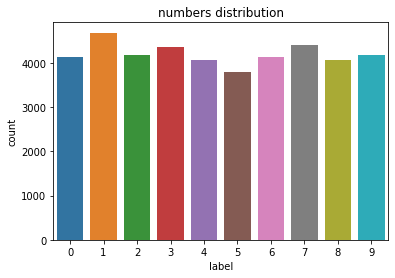

In [10]:
sns.countplot(data=training_set,x="label")
plt.title("numbers distribution")

### Data Preprocessing

In [11]:
x_train=training_set.drop(columns=["label"])
y_train=training_set["label"]

In [12]:
X_train,Y_train=x_train.to_numpy(),y_train.to_numpy()

In [13]:
X_train.shape,Y_train.shape

((42000, 784), (42000,))

### Data Visualization

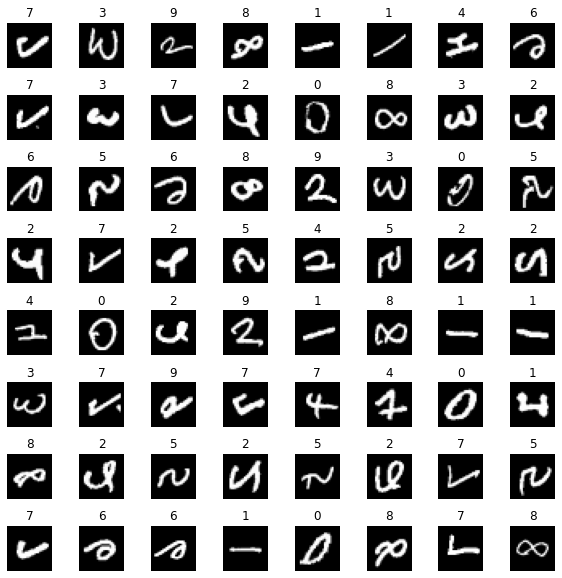

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y_train[random_index])
    ax.set_axis_off()

### Building the Neural Network

In [33]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(units=40,activation='relu'),
        Dense(units=25,activation='relu'),
        Dense(units=10,activation='linear')
 
    ], name = "my_model" 
)

In [34]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 40)                31400     
                                                                 
 dense_7 (Dense)             (None, 25)                1025      
                                                                 
 dense_8 (Dense)             (None, 10)                260       
                                                                 
Total params: 32,685
Trainable params: 32,685
Non-trainable params: 0
_________________________________________________________________


In [35]:
[layer1, layer2, layer3] = model.layers

In [36]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 40), b1 shape = (40,)
W2 shape = (40, 25), b2 shape = (25,)
W3 shape = (25, 10), b3 shape = (10,)


### Model Training

In [37]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,Y_train,
    epochs=100
)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3277
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.6247
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4311
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3221
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2611
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2315
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1980
Epoch 8/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1761
Epoch 9/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1702
Epoch 10/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1512
Epoch 11/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1397
Epoch 12/100
1313/1313 [==============================] - 3s 2ms/step - lo

### Visualizing the loss

In [38]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False  
    
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

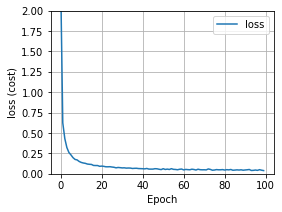

In [39]:
plot_loss_tf(history)

### Making Predictions

In [40]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((28,28)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

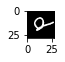

 predicting a digit: 
[[ 73.43919   21.886963  33.691807  68.03662   81.8294    84.00547
  -16.512728  58.787334  67.00117   92.9894  ]]
 Largest Prediction index: 9


In [41]:
image_of_two = X_train[1080]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,784))  # prediction

print(f" predicting a digit: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [42]:
prediction_p = tf.nn.softmax(prediction)
print(f" predicting a digit. Probability vector: \n{prediction_p}")
print(f" Highest probability: {np.argmax(prediction_p)}")

 predicting a digit. Probability vector: 
[[3.2314054e-09 1.3199031e-31 1.7673421e-26 1.4557404e-11 1.4230212e-05
  1.2539121e-04 0.0000000e+00 1.4001347e-15 5.1688285e-12 9.9986041e-01]]
 Highest probability: 9


### Testing the model

In [43]:
# import and prepare the testing set
testing_set=pd.read_csv("/content/data/test.csv")
testing_set.head(5)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_test=testing_set.to_numpy()
X_test.shape

(28000, 784)

In [45]:
prediction = model.predict(X_test)  # prediction

#print(f" predicting a digit: \n{prediction}")
y_hat=[]
for i in range(len(prediction)):
  y_hat.append(np.argmax(prediction[i,:]))
print(y_hat[:10])

[2, 0, 9, 2, 3, 7, 0, 3, 0, 3]


### Preparing the submission file

In [46]:
sub=pd.read_csv("/content/data/sample_submission.csv")
Id=sub["ImageId"].to_numpy()
submission=pd.DataFrame({"ImageId":Id,"Label":y_hat})
submission


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [47]:
submission.to_csv("submission.csv")